######The latest version of this IPython notebook is available at [http://github.com/jckantor/CBE20255](http://github.com/jckantor/CBE20255)  for noncommercial use under terms of the [Creative Commons Attribution Noncommericial ShareAlike License](http://creativecommons.org/licenses/by-nc-sa/4.0/).

J.C. Kantor (Kantor.1@nd.edu)

# Isothermal Flash and the Rachford-Rice Equation

This [IPython notebook](http://ipython.org/notebook.html) illustrates the use of the Rachford-Rice equation solve the material balances for an isothermal flash of an ideal mixture. The video is used with permission from [learnCheme.com](http://learncheme.ning.com/), a project at the University of Colorado funded by the National Science Foundation and the Shell Corporation.

In [3]:
#Initializations
from IPython.core.display import HTML
HTML(open("../styles/custom.css", "r").read())

## Derivation of the Rachford-Rice Equation

The derivation of the Rachford-Rice equation is a relatively straightford application of component material balances and Raoult's law for an ideal solution.

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("ACxOiXWq1SQ",560,315,rel=0)

The quantities, definitions, and equations are summarized in the following figure.

<img src="files/images/FlashDrumFigure.png" style="width:600px"/>

To sketch the derivation, we begin with the overall constraint on the liquid 
phase and vapor phase mole fractions $x_1 + x_2 + \cdots + x_N = 1$ and $y_1 + y_2 + \cdots + y_N = 1$. Subtracting the first from the second we find

$$\sum_{n=1}^N (y_n - x_n) = 0$$

This doesn't look like much, but it turns out to be the essential trick in developing the development. What we need know are expressions for $y_n$ and $x_n$ that we can substitute into terms in the sum. We get these by solving the component material balance and equilibrium equations for $y_n$ and $x_n$.

For each species we write a material balance

$$L x_n + V y_n = F z_n$$

Dividing through by the feedrate we get a parameter $\phi = \frac{V}{L}$ denoting the fraction of the feedstream that leaves the flash unit in the vapor stream, the remaining fraction $1-\phi$ leaving in the liquid stream.  With this notation the material balance becomes

$$(1-\phi)x_n + \phi y_n = z_n$$

for each species.  

The second equation is

$$y_n = K_n x_n$$

where the 'K-factor' for an ideal solution is given by Raoult's law

$$K_n = \frac{P_n^{sat}(T)}{P}$$

The K-factor depends on the operating pressure and temperature of the flash unit. Solving the material balance and equilibrium equations gives

$$x_n = \frac{z_n}{1 + \phi(K_n - 1)}$$

$$y_n = \frac{K_n z_n}{1 + \phi(K_n - 1)}$$

so that the difference $y_n - x_n$ is given by

$$y_n - x_n = \frac{(K_n - 1)z_n}{1 + \phi(K_n - 1)}$$

Substitution leads to the Rachford-Rice equation

$$\sum_{n=1}^{N} \frac{(K_n - 1)z_n}{1 + \phi(K_n - 1)} = 0 $$

## Problem Classification

| Problem Type | z<sub>i</sub>'s | T       | P       | &phi;   | Action |
| -----------: | :-----: | :-----: | :-----: | :-----: | :----: |
| Bubble Point | &check; | unknown | &check; | 0       | Set x<sub>i</sub> = z<sub>i</sub>. Solve for T and y<sub>i</sub>'s |
| Bubble Point | &check; | &check; | unknown | 0       | Set x<sub>i</sub> = z<sub>i</sub>. Solve for P and y<sub>i</sub>'s |
| Dew Point    | &check; | unknown | &check; | 1       | Set y<sub>i</sub> = z<sub>i</sub>. Solve for T and x<sub>i</sub>'s |
| Dew Point    | &check; | &check; | unknown | 1       | Set y<sub>i</sub> = z<sub>i</sub>. Solve for P and x<sub>i</sub>'s |
| Isothermal Flash | &check; | &check; | &check; | unknown | Solve for &phi;, x<sub>i</sub>'s, and y<sub>i</sub>'s |


## Isothermal Flash of a Binary Mixture

Problem specifications

In [21]:
A = 'acetone'
B = 'ethanol'

P = 760
T = 65

z = dict()
z[A] = 0.6
z[B] = 1 - z[A]

Compute the K-factors for the given operating conditions

In [25]:
# Antoine's equations. T [deg C], P [mmHg]
Psat = dict()
Psat[A] = lambda T: 10**(7.02447 - 1161.0/(224 + T))
Psat[B] = lambda T: 10**(8.04494 - 1554.3/(222.65 + T))

# Compute K-factors
K = dict()
K[A] = Psat[A](T)/P
K[B] = Psat[B](T)/P

print "Pressure     {:6.2f} [mmHg]".format(P)
print "Temperature  {:6.2f} [deg C]".format(T)
print "K-factors:"
for n in Psat:
    print "   {:s}  {:7.3f}".format(n,K[n])

Pressure     760.00 [mmHg]
Temperature   65.00 [deg C]
K-factors:
   ethanol    0.576
   acetone    1.338
{'ethanol': 0.5763479133101325, 'acetone': 1.337689658645641}


Rachford-Rice equation

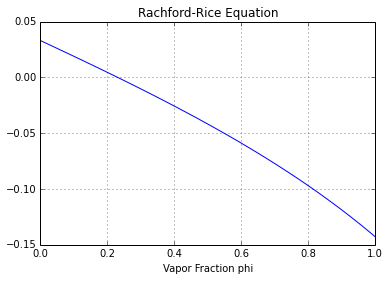

In [23]:
def RR(phi):
    return (K[A]-1)*z[A]/(1 + phi*(K[A]-1)) + (K[B]-1)*z[B]/(1 + phi*(K[B]-1))

phi = linspace(0,1)
plot(phi,map(RR,phi))
xlabel('Vapor Fraction phi')
title('Rachford-Rice Equation')
grid();

Finding roots of the Rachford-Rice equation

In [24]:
from scipy.optimize import brentq

phi = brentq(RR,0,1)

print "Vapor Fraction  {:6.4f}".format(phi)
print "Liquid Fraction {:6.4f}".format(1-phi)

Vapor Fraction  0.2317
Liquid Fraction 0.7683


Compositions

In [49]:
x = dict()
y = dict()

print "Component    z[n]    x[n]    y[n]"

for n in [A,B]:
    x[n] = z[n]/(1 + phi*(K[n]-1))
    y[n] = K[n]*x[n]
    print "{:10s} {:6.4n}  {:6.4f}  {:6.4f}".format(n,z[n],x[n],y[n])

Component    z[n]    x[n]    y[n]
acetone       0.6  0.5565  0.7444
ethanol       0.4  0.4435  0.2556


## Multicomponent Mixtures

In [45]:
P = 760
T = 65

z = dict()
z['acetone'] = 0.6
z['benzene'] = 0.01
z['toluene'] = 0.01
z['ethanol'] = 1 - sum(z.values())

In [56]:
Psat = dict()
Psat['acetone'] = lambda T: 10**(7.02447 - 1161.0/(224 + T))
Psat['benzene'] = lambda T: 10**(6.89272 - 1203.531/(219.888 + T))
Psat['ethanol'] = lambda T: 10**(8.04494 - 1554.3/(222.65 + T))
Psat['toluene'] = lambda T: 10**(6.95805 - 1346.773/(219.693 + T))

K = {n : lambda P,T,n=n: Psat[n](T)/P for n in Psat}

print "Pressure     {:6.2f} [mmHg]".format(P)
print "Temperature  {:6.2f} [deg C]".format(T)
print "K-factors:"
for n in K:
    print "   {:s}  {:7.3f}".format(n,K[n](P,T))

Pressure     760.00 [mmHg]
Temperature   65.00 [deg C]
K-factors:
   benzene    0.613
   acetone    1.338
   ethanol    0.576
   toluene    0.222


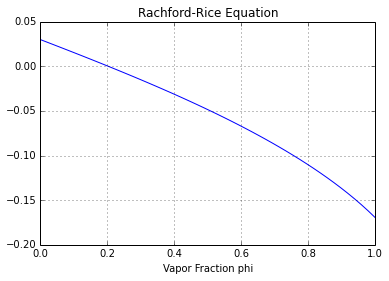

In [51]:
def RR(phi):
    return sum([(K[n](P,T)-1)*z[n]/(1 + phi*(K[n](P,T)-1)) for n in K.keys()])

phi = linspace(0,1)
plot(phi,map(RR,phi))
xlabel('Vapor Fraction phi')
title('Rachford-Rice Equation')
grid();

In [52]:
from scipy.optimize import brentq
 
phi = brentq(RR,0,1)

print "Vapor Fraction  {:6.4f}".format(phi)
print "Liquid Fraction {:6.4f}".format(1-phi)

Vapor Fraction  0.2033
Liquid Fraction 0.7967


In [78]:
x = {n: z[n]/(1 + phi*(K[n](P,T)-1)) for n in z}
y = {n: K[n](P,T)*z[n]/(1 + phi*(K[n](P,T)-1)) for n in z}

print "Component    z[n]    x[n]    y[n]"

for n in z.keys():
    print "{:10s} {:6.4f}  {:6.4f}  {:6.4f}".format(n,z[n],x[n],y[n])

Component    z[n]    x[n]    y[n]
benzene    0.0100  0.0109  0.0067
ethanol    0.3800  0.4158  0.2396
acetone    0.6000  0.5615  0.7511
toluene    0.0100  0.0119  0.0026


## Henry's Law

In [81]:
s = (i for i in range(10))
for k in range(10):
    print s[1]

TypeError: 'generator' object has no attribute '__getitem__'

[Experiments](http://en.wikipedia.org/wiki/MythBusters_%282005_season%29#Bottle_Rocket_Blast-Off) suggest the bursting pressure of a 2 liter soda bottle is 150 psig. 

## Exercises

### Design of a Carbonated Beverage

The purpose of carbonating beverages is to provide a positive pressure inside the package to keep out oxygen and other potential contaminants. The burst pressure of 2 liter soda bottles [has been measured to be 150 psig](http://en.wikipedia.org/wiki/MythBusters_%282005_season%29#Bottle_Rocket_Blast-Off) (approx. 10 atm). For safety, suppose you want the bottle pressure to be no more than 6 atm gauge on a hot summer day in Arizona (say 50 &deg;C, ) and yet have at least 0.5 atm of positive gauge pressure at 0 &deg;C. Assuming your beverage is a mixture of CO<sub>2</sub> and water, is it possible to meet this specification? What concentration (measured in g of CO<sub>2</sub> per g of water) would you recommend?